In [1]:
import os
import pandas as pd
import pylab as pl
%pylab inline

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

Populating the interactive namespace from numpy and matplotlib


## IDEA: Customers are less likely to ride citibike than subscribers during weekdays in March 2015. 

## $H_0$: The portion of customers riding citibike on weekdays is the same or higher than the portion of subscribers riding citibike on weekdays.

## $H_1$: The portion of customers riding citibike on weekdays is lower than the portion of subscribers riding citibike on weekdays.
# _$H_0$_ : $\frac{C_{\mathrm{weekday}}}{C_{\mathrm{total}}} >= \frac{S_{\mathrm{weekday}}}{S_{\mathrm{total}}}$
# _$H_1$_ : $\frac{C_{\mathrm{weekday}}}{C_{\mathrm{total}}} < \frac{S_{\mathrm{weekday}}}{S_{\mathrm{total}}}$

## I will use a significance level  $\alpha=0.05$

In [2]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 
         'birth year', 'gender', ], axis=1, inplace = True)

In [7]:
df.head()

,usertype,date
0,Subscriber,2015-03-01 00:00:00
1,Subscriber,2015-03-01 00:01:00
2,Customer,2015-03-01 00:01:00
3,Subscriber,2015-03-01 00:02:00
4,Subscriber,2015-03-01 00:02:00


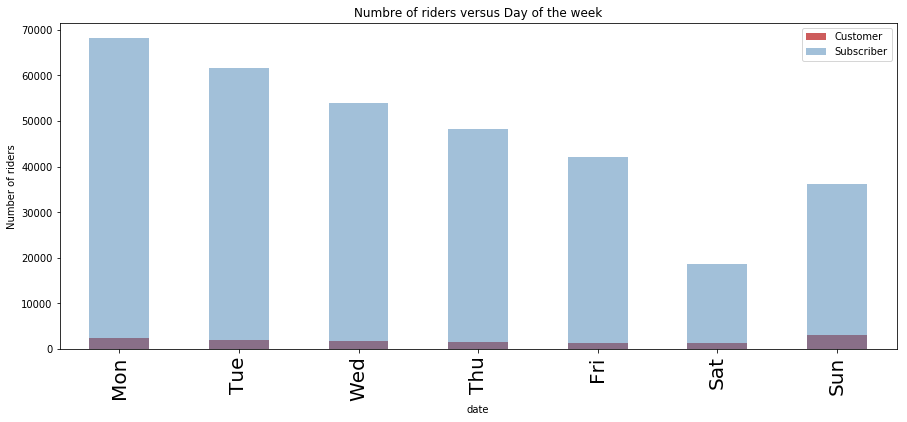

In [8]:
fig = pl.figure()

norm_c = 1
((df['date'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday]).count()) / norm_c).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Customer')

norm_s = 1
ax = ((df['date'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday]).count()) / norm_s).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Subscriber')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.ylabel("Number of riders")
pl.title("Numbre of riders versus Day of the week")
pl.legend()

## Figure 1.1: Distribution of Citibike bikers by usertype in March 2015, absolute counts

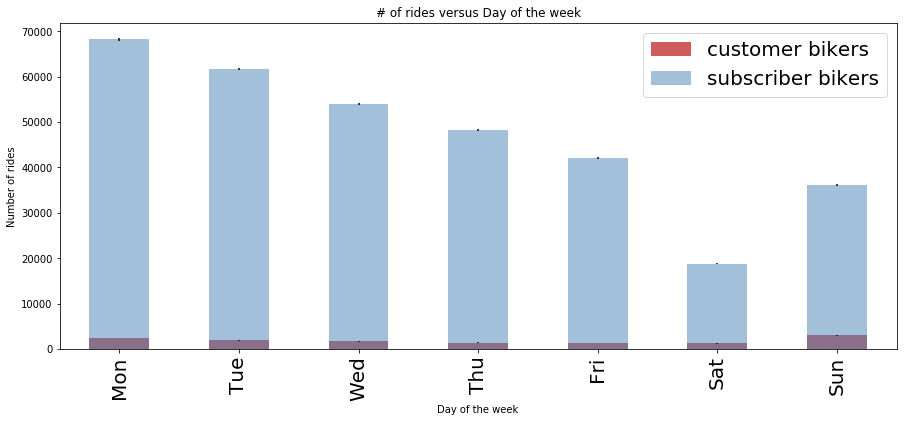

In [9]:
fig=pl.figure()

counts_c = df.date[df.usertype == 'Customer'].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='customer bikers')


counts_s = df.date[df.usertype == 'Subscriber'].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s=np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='subscriber bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
ax.set_title("# of rides versus Day of the week")
pl.legend(['customer bikers','subscriber bikers'],fontsize=20)

## Figure 1.2: Distribution of Citibike bikers by usertype in March 2015, absolute counts, with statistical errors

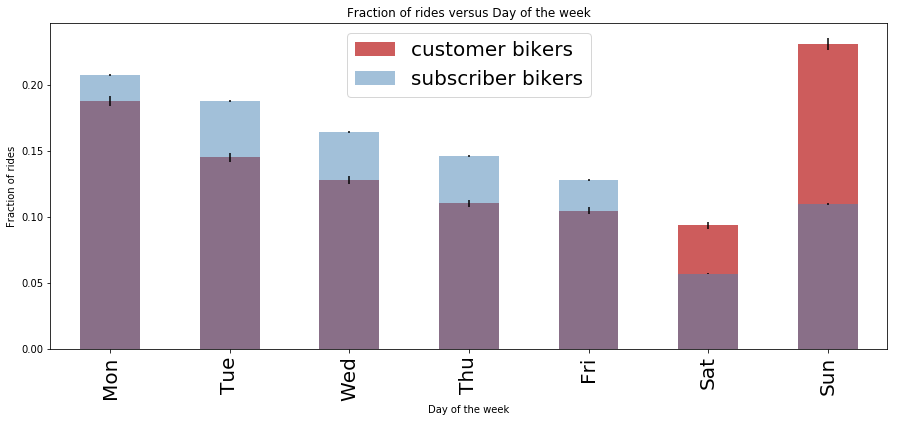

In [10]:
fig = pl.figure()

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           label='customer bikers')

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='SteelBlue', label='subscriber bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")
ax.set_title("Fraction of rides versus Day of the week")

pl.legend(['customer bikers','subscriber bikers'],fontsize=20)


## Figure 1.3: Distribution of Citibike bikers by usertype in March 2015, normalized

Subscribers: week:0.833, weekend:0.167, weekend error:0.002, weekend error:0.001
Customers: week:0.675, weekend:0.325, weekend error:0.007, weekend error:0.005


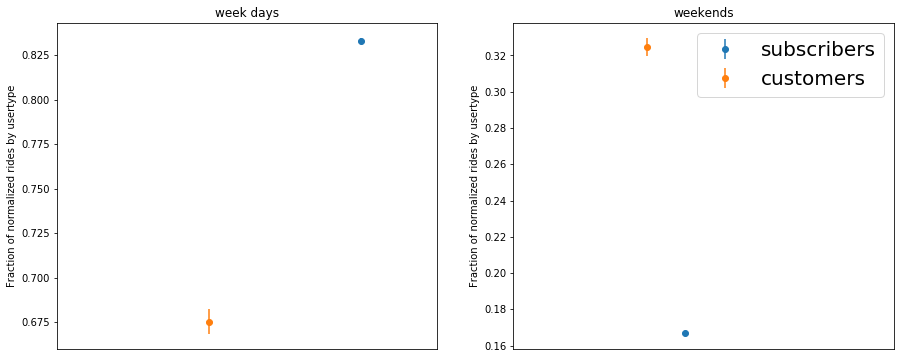

In [30]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

#for customers
week_c = sum(counts_c[:-2]) * 1.0 / norm_c  #fraction of women riding on week days
weekend_c = sum(counts_c[-2:]) * 1.0 / norm_c  #fraction of women riding on weekends
eweek_c = np.sqrt(sum(error_c[:-2]**2)) / norm_c  #error on fraction number of women riding on week days
eweekend_c = np.sqrt(sum(error_c[-2:]**2)) / norm_c #error on fraction number of women riding on weekends

#same nomenclature as above
#for subscribers
week_s = sum(counts_s[:-2]) * 1.0 / norm_s
weekend_s = sum(counts_s[-2:]) * 1.0 / norm_s
eweek_s = np.sqrt(sum(error_s[:-2]**2)) / norm_s
eweekend_s = np.sqrt(sum(error_s[-2:]**2)) / norm_s

print("Subscribers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_s, weekend_s, eweek_s, eweekend_s))
print("Customers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_c, weekend_c, eweek_c, eweekend_c))

ax1.errorbar([0.4], [week_s], yerr=[eweek_s], fmt='o', label='subscribers')
ax1.errorbar([0.2], [week_c], yerr=[eweek_c], fmt='o', label='customers')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_s], yerr=[eweekend_s], fmt='o', label='subscribers')
ax2.errorbar([0.2], [weekend_c], yerr=[eweekend_c], fmt='o', label='customers')
ax2.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by usertype")
ax1.set_ylabel("Fraction of normalized rides by usertype")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 2: Fraction of Citibike bikers per user type in March 2015 for week days on the left and weekends on the right.

In [16]:
P0mP1 = week_s - week_c
print ("difference between customers and subscribers on weekday: ", P0mP1)
if P0mP1 <= 0:
    print("In accordance with Null Hypothesis")
else:
    print ("We must check the significance before we reject the Null Hypothesis")

difference between customers and subscribers on weekday:  0.157804571088
We must check the significance before we reject the Null Hypothesis


In [26]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

sp_stdev_cs = se(p(week_s, week_c, norm_s, norm_c), norm_s, norm_c)
# print (sp_stdev_mw)
z = zscore(week_s, week_c, sp_stdev_cs)
print ("The z statistics is %.2f"%z) 

The z statistics is 46.42


### Since the z statistics is 46.42 which is larger than 3, the p-value is smaller than 0.0002. p<0.0002 is less than significant level 0.05 so we reject the null hypothesis and conclude that customers are less likely to ride citibike than subscribers during weekdays.